<a href="https://colab.research.google.com/github/AMassani/Angular.Project1/blob/master/Recommendation_Systems_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Amazon Product Recommendation System**

# **Marks: 60**


Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions.

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing surprise library**

In [2]:
!pip install numpy==1.24.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.3 w

In [1]:
!pip install scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505225 sha256=5ebeb0e7af40095d5369adc07ee3fc71c478887ca3b517a78d9c6515d7fbb95e
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
import numpy as np
print(np.__version__)

import surprise
print(surprise.__version__)


1.24.3
1.1.4


## **Importing the necessary libraries and overview of the dataset**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict # this will return default value if the value is missing

import warnings
warnings.filterwarnings('ignore')


### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

In [3]:
df = pd.read_csv('/content/sample_data/ratings_Electronics.csv')

# Assign column names to each column loaded in the data frame
df.columns = ['user_id','prod_id','rating','timestamp']

# Check the data types of the data loaded in all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7438455 entries, 0 to 7438454
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    object 
 1   prod_id    object 
 2   rating     float64
 3   timestamp  float64
dtypes: float64(2), object(2)
memory usage: 227.0+ MB


In [4]:

# Verify by printing the top 5 rows
df.head()


,user_id,prod_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
1,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
2,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
3,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09
4,A1QGNMC6O1VW39,0511189877,5.0,1.397434e+09


In [5]:

# We will drop the timestamp column as it is not useful for this use case
df.drop('timestamp', axis=1, inplace=True)

df

,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0
...,...,...,...
7438450,A25R0DOPSVITPN,B00DR0PDNE,1.0
7438451,A2VWNZNFV8QCP0,B00DR0PDNE,1.0
7438452,AT8TS7XTO8TIE,B00DR0PDNE,4.0
7438453,A7U585KFYM2HD,B00DR0PDNE,1.0


**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [6]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

len(ratings_count)

4040555

In [7]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [8]:
df.head()

,user_id,prod_id,rating
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106918 entries, 93 to 7438279
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  106918 non-null  object 
 1   prod_id  106918 non-null  object 
 2   rating   106918 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.3+ MB


In [10]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [11]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [12]:
# Print a few rows of the imported dataset
df_final.head()

,user_id,prod_id,rating
2081,A2ZR3YTMEEIIZ4,1400532655,5.0
2149,A3CLWR1UUZT6TG,1400532655,5.0
2161,A5JLAU2ARJ0BO,1400532655,1.0
2227,A1P4XD7IORSEFN,1400532655,4.0
2436,A3HPCRD9RX351S,1400532655,3.0


## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [13]:
# Check the number of rows and columns and provide observations
rows, cols = df_final.shape
print(f"Rows: {rows}, Columns: {cols}")


Rows: 52535, Columns: 3


**Write your observations here:** The dataset has been cleaned up with manageable number of dataset with products and ratings filtered out

### **Data types**

In [14]:
# Check Data types and provide observations
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 52535 entries, 2081 to 7438279
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  52535 non-null  object 
 1   prod_id  52535 non-null  object 
 2   rating   52535 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.6+ MB
None


**Write your observations here:** df.info() provides a summary, including the number of non-null values.

### **Checking for missing values**

In [15]:
# Check for missing values present and provide observations
print(df.isnull().sum())

user_id    0
prod_id    0
rating     0
dtype: int64


**Write your observations here:** The dataset has no missing values

### **Summary Statistics**

In [16]:
# Summary statistics of 'rating' variable and provide observations

print(df_final['rating'].describe())


count    52535.000000
mean         4.287332
std          1.002241
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


**Write your observations here:** There are 65290 ratings, average rating is 4.29 which means users have generally given high ratings. The standard deviation is 0.98 which means it has some variations. The min and max user ratings are 1 and 5. 25% of users rated 4.0, 50% of users rated 5.0 and 75% of users have rated 5.0. If a large portion of ratings are 5.0, it may indicate a bias towards positive reviews.

### **Checking the rating distribution**

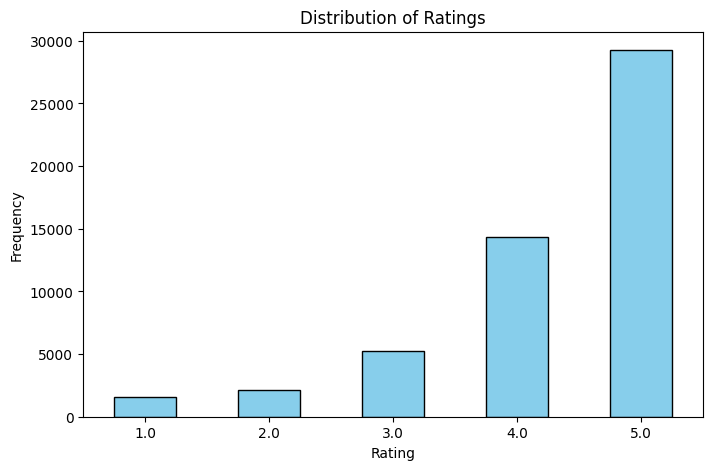

In [17]:
# Create the bar plot and provide observations
import pandas as pd
import matplotlib.pyplot as plt

# Count unique ratings
rating_counts = df_final['rating'].value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(8,5))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Labels and Title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.xticks(rotation=0)

# Show plot
plt.show()


**Write your observations here:** Most ratings are 4 and 5, indicating that users generally give high ratings. Few users give 1 or 2-star ratings, suggesting that there are few dissatisfied customers. The distribution is right-skewed, meaning users tend to give higher ratings more often than lower ratings.

### **Checking the number of unique users and items in the dataset**

In [18]:
# Number of total rows in the data and number of unique user id and product id in the data
total_rows = df_final.shape[0]
print(f"Total number of rows: {total_rows}")

unique_user_ids = df_final['user_id'].nunique()
print(f"Number of unique user IDs: {unique_user_ids}")

unique_product_ids = df_final['prod_id'].nunique()
print(f"Number of unique product IDs: {unique_product_ids}")


Total number of rows: 52535
Number of unique user IDs: 1342
Number of unique product IDs: 4779


**Write your observations here:** There are 65290 rows in the dataset out of which there are 1540 unique users who provided ratings on 5689 unique products

### **Users with the most number of ratings**

In [19]:
# Top 10 users based on the number of ratings
top_10_users = df['user_id'].value_counts().head(10)
print("Top 10 users based on number of ratings:")
print(top_10_users)


Top 10 users based on number of ratings:
user_id
A5JLAU2ARJ0BO     515
A3OXHLG6DIBRW8    482
ADLVFFE4VBT8      439
A6FIAB28IS79      430
A680RUE1FDO8B     380
A1ODOGXEYECQQ8    329
A2AY4YUOX2N1BQ    301
AWPODHOB4GFWL     270
ARBKYIVNYWK3C     270
A17BUUBOU0598B    261
Name: count, dtype: int64


**Write your observations here:** df_final['user_id'].value_counts() counts how many ratings each user has provided.
.head(10) retrieves the top 10 users with the highest count of ratings.

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [20]:
# Calculate the average rating for each product
print('---Calculate the average rating for each product-----------------')
# Group by 'prod_id' and calculate the mean rating for each product
average_ratings = df_final.groupby('prod_id')['rating'].mean()

# Sort products by the average rating (highest to lowest)
sorted_average_ratings = average_ratings.sort_values(ascending=False)

# Display the average ratings and sorted rankings
print(sorted_average_ratings)


# Calculate the count of ratings for each product
print('---Calculate the count of ratings for each product--------------')
# Group by 'product_id' and count the number of ratings for each product
rating_counts = df_final.groupby('prod_id')['rating'].count()

# Display the count of ratings for each product
print(rating_counts)

# Create a dataframe with calculated average and count of ratings
print('---Create a dataframe with calculated average and count of ratings---')
# Calculate average rating and count of ratings for each product
# rating_summary = df_final.groupby('prod_id')['rating'].agg(['mean', 'count'])
rating_summary = pd.DataFrame(
    {'average_rating': average_ratings,
     'rating_count': rating_counts
     }
    )

# Rename the columns for clarity
rating_summary.columns = ['average_rating', 'rating_count']

# Display the result
print(rating_summary)


# Sort the dataframe by average of ratings in the descending order
print('---Sort the dataframe by average of ratings in the descending order---')
rating_summary = rating_summary.sort_values(by='average_rating', ascending=False)
print(rating_summary)

# See the first five records of the "final_rating" dataset
print('---See the first five records of the "final_rating" dataset-----------')
rating_summary.head()


---Calculate the average rating for each product-----------------
prod_id
B003XDU2Y0    5.000000
B002JCSV5I    5.000000
B000144I2Q    5.000000
B0029ZA78O    5.000000
B002AJMHMI    5.000000
                ...   
B00170F3SQ    2.000000
B000ND75C0    1.833333
B003O2RVGM    1.818182
B007C0Y7RI    1.666667
B000UF3FT8    1.375000
Name: rating, Length: 4779, dtype: float64
---Calculate the count of ratings for each product--------------
prod_id
1400532655     5
9983891212     7
B00000DM9W     5
B00000J1V5     7
B00000JDF5     6
              ..
B00DQZTS8Q     9
B00DR0B31U    11
B00DR0B7Y8     9
B00DR0C96S    15
B00DR0PDNE    29
Name: rating, Length: 4779, dtype: int64
---Create a dataframe with calculated average and count of ratings---
            average_rating  rating_count
prod_id                                 
1400532655        3.600000             5
9983891212        4.857143             7
B00000DM9W        5.000000             5
B00000J1V5        4.571429             7
B00000JDF5   

,average_rating,rating_count
prod_id,,
B003XDU2Y0,5.0,5
B002JCSV5I,5.0,5
B000144I2Q,5.0,7
B0029ZA78O,5.0,5
B002AJMHMI,5.0,6


In [21]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions
def get_top_n_products(df, n, min_interactions):

# Finding products with minimum number of interactions
  filtered_summary = df[df['rating_count'] >= min_interactions]

# Sorting values with respect to average rating in descending order
  top_n_products = filtered_summary.sort_values(by='average_rating', ascending=False).head(n)

  return top_n_products

### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [22]:
top_5_products = get_top_n_products(rating_summary, n=5, min_interactions=50)
print(top_5_products)

            average_rating  rating_count
prod_id                                 
B001TH7GUU        4.932432            74
B0019EHU8G        4.896104            77
B003ES5ZUU        4.866279           172
B006W8U2MU        4.826923            52
B000QUUFRW        4.810127            79


### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [23]:
top_5_products = get_top_n_products(rating_summary, n=5, min_interactions=100)
print(top_5_products)

            average_rating  rating_count
prod_id                                 
B003ES5ZUU        4.866279           172
B000N99BBC        4.767606           142
B007WTAJTO        4.700680           147
B002V88HFE        4.693069           101
B004CLYEDC        4.663462           104


We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [24]:
import numpy as np
print(np.__version__)

import surprise
print(surprise.__version__)

1.24.3
1.1.4


In [25]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [26]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [27]:
# Instantiating Reader scale with expected rating scale
from surprise import Reader

# Define the rating scale (e.g., from 1 to 5)
reader = Reader(rating_scale=(1, 5))

# Loading the rating dataset
from surprise import Dataset

dataset = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
from surprise.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)

# Print the number of training and testing samples
print(f"Training set size: {trainset.n_ratings}")
print(f"Test set size: {len(testset)}")

Training set size: 42028
Test set size: 10507


Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [28]:
# Declaring the similarity options
sim_options = {
    'name': 'cosine',  # Similarity metric: 'cosine' or 'pearson'
    'user_based': True  # True for User-User similarity, False for Item-Item similarity
}

# Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
from surprise import KNNBasic

model = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Fit the model on the training data
model.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(model)

RMSE: 1.0454
Precision:  0.845
Recall:  0.865
F_1 score:  0.855


**Write your observations here:** RMSE score of 1.0012 measures how far the predicted ratings are from the actual ratings. Precision score of 85.5% meas most of the products recommended to the user are relevant. Recall of 85.8% means proportions of relevant items actually were recommended. This means the model is retrieving a large portion of relevant items which is good for the coverage. F_1 score of 0.856 indicates a strong balance between precision and recall, meaning the model is both accurate and comprehensive in making recommendations.

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [29]:
# Predicting rating for a sample user with an interacted product

user_id = 'A3LDPF5FMB782Z'  # Replace with an actual user ID
product_id = '1400501466'  # Replace with an actual product ID

prediction = model.predict(user_id, product_id)

# Display the predicted rating
print(f"Predicted rating for User {user_id} on Product {product_id}: {prediction.est}")

Predicted rating for User A3LDPF5FMB782Z on Product 1400501466: 4.287451222994195


**Write your observations here:** The user gave 5 rating while the model predicted 3.4. This suggests that the model underestimated the user's preference for this product. The model might be facing a cold start problem. It could also be a limitation of Similarity metric, and we could try using some other Similarity metric. We could also try by tuning hyperparameters

Below is the function to find the **list of users who have not seen the product with product id "1400501466"**.

In [30]:
def n_users_not_interacted_with(n, data, prod_id):
    users_interacted_with_product = set(data[data['prod_id'] == prod_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_interacted_with_product))[:n] # where n is the number of elements to get in the list

In [31]:
# Find unique user_id where prod_id is not equal to "1400501466"
n_users_not_interacted_with(5, df_final, '1400501466')

['ANTN61S4L7WG9',
 'A1CSRR7FCKBL9M',
 'A3VBXQKRM7A4JR',
 'A23NSKTMSPPBTR',
 'A1MRPX3RM48T2I']

* It can be observed from the above list that **user "A2UOHALGF2X77Q" has not seen the product with productId "1400501466"** as this user id is a part of the above list.

**Below we are predicting rating for `userId=A2UOHALGF2X77Q` and `prod_id=1400501466`.**

In [32]:
# Predicting rating for a sample user with a non interacted product
user_id = 'A3FS3FJPD3RJTD'  # Replace with an actual user ID
product_id = '1400501466'  # Replace with an actual product ID

prediction = model.predict(user_id, product_id)

# Display the predicted rating
print(f"Predicted rating for User {user_id} on Product {product_id}: {prediction.est}")

Predicted rating for User A3FS3FJPD3RJTD on Product 1400501466: 4.287451222994195


**Write your observations here:** In collaborative filtering systems, when a user has not seen a product, the model generates a predicted rating based on the similarity of the user with other users who have rated the product. In this case, the model predicted a rating of 4.29, which is relatively high, indicating that the model expects the user to like the product quite a bit.

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [34]:
# Setting up parameter grid to tune the hyperparameters
from surprise.model_selection import GridSearchCV

# Define the similarity options for KNNBasic
sim_options = {
    'name': ['cosine','msd', 'pearson'],  # similarity metrics
    'user_based': [True, False]  # user-user or item-item similarity
}

# Create a parameter grid for GridSearchCV
param_grid = {
    'k': [5, 10, 20],  # number of neighbors to consider
    'sim_options': sim_options
}

# Performing 3-fold cross-validation to tune the hyperparameters
# Load your dataset (assuming 'df' is your DataFrame with 'user_id', 'product_id', 'rating')
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)

# Fitting the data
grid_search.fit(data)

# Best RMSE score
# Get and print the best hyperparameters and the best score (RMSE)
print("Best parameters:", grid_search.best_params)
print("Best RMSE:", grid_search.best_score['rmse'])

# Get all results for further analysis (optional)
results = grid_search.cv_results
print("All results:", results)

# Combination of parameters that gave the best RMSE score


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similar

Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [35]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {
    'name': 'pearson',  # Similarity metric: 'cosine' or 'pearson'
    'user_based': True  # True for User-User similarity, False for Item-Item similarity
}

# Creating an instance of KNNBasic with optimal hyperparameter values
model_optimized = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Training the algorithm on the trainset
model_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(model_optimized)


RMSE: 1.0586
Precision:  0.835
Recall:  0.893
F_1 score:  0.863


**Write your observations here:** The RMSE value of 1.0586 suggests that, on average, the predicted ratings deviate from the actual ratings by around 1.06 points. The model correctly identifies 83.5% of the recommended products as relevant. The model successfully retrieves 89.3% of relevant items for users. Since F1-score is closer to 1, the model is performing well in both aspects.



### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [36]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466

user_id = 'A3LDPF5FMB782Z'  # Replace with an actual user ID
product_id = '1400501466'  # Replace with an actual product ID

prediction = model.predict(user_id, product_id)

# Display the predicted rating
print(f"Predicted rating for User {user_id} on Product {product_id}: {prediction.est}")

Predicted rating for User A3LDPF5FMB782Z on Product 1400501466: 4.287451222994195


In [37]:
# Use sim_user_user_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"

user_id = 'A2UOHALGF2X77Q'  # Replace with an actual user ID
product_id = '1400501466'  # Replace with an actual product ID

prediction = model.predict(user_id, product_id)

# Display the predicted rating
print(f"Predicted rating for User {user_id} on Product {product_id}: {prediction.est}")

Predicted rating for User A2UOHALGF2X77Q on Product 1400501466: 4.287451222994195


**Write your observations here:** Since this user has never rated this product, the model is making a prediction based on similar users or product popularity. This indicates that the recommendation system is using collaborative filtering or a default fallback mechanism (such as an item’s average rating).

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [ ]:
# 0 is the inner id of the above user


### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [ ]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine


In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

In [ ]:
# Declaring the similarity options

# KNN algorithm is used to find desired similar items. Use random_state=1

# Train the algorithm on the trainset, and predict ratings for the test set

# Let us compute precision@k, recall@k, and f_1 score with k = 10


**Write your observations here:**____________

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [ ]:
# Predicting rating for a sample user with an interacted product


**Write your observations here:**____________

Below we are **predicting rating for the `userId = A2UOHALGF2X77Q` and `prod_id = 1400501466`**.

In [ ]:
# Predicting rating for a sample user with a non interacted product


**Write your observations here:**____________

### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [ ]:
# Setting up parameter grid to tune the hyperparameters

# Performing 3-fold cross validation to tune the hyperparameters

# Fitting the data

# Find the best RMSE score

# Find the combination of parameters that gave the best RMSE score


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [ ]:
# Using the optimal similarity measure for item-item based collaborative filtering

# Creating an instance of KNNBasic with optimal hyperparameter values

# Training the algorithm on the trainset

# Let us compute precision@k and recall@k, f1_score and RMSE


**Write your observations here:__________**

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"


In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"


**Write your observations here:__________**

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.


In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [ ]:
# Using SVD matrix factorization. Use random_state = 1

# Training the algorithm on the trainset

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE


**Write your observations here:___________**

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [ ]:
# Making prediction


**Write your observations here:___________**

**Below we are predicting rating for the `userId = "A2UOHALGF2X77Q"` and `productId = "1400501466"`.**

In [ ]:
# Making prediction


**Write your observations here:___________**

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [ ]:
# Set the parameter space to tune

# Performing 3-fold gridsearch cross-validation

# Fitting data

# Best RMSE score

# Combination of parameters that gave the best RMSE score


Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [ ]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1

# Train the algorithm on the trainset

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE


**Write your observations here:_____________**

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"


In [ ]:
# Use svd_algo_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"


### **Conclusion and Recommendations**

**Write your conclusion and recommendations here**